In [1]:
import torch as t

In [2]:
a = t.randn(3,4,requires_grad=True)
a = t.randn(3,4).requires_grad_()
a

tensor([[ 0.3160,  1.3798,  0.3197, -1.3596],
        [ 1.4410,  1.2033,  1.3659, -1.1656],
        [-2.0030, -0.3654, -1.8291, -1.8659]], requires_grad=True)

In [3]:
b = t.zeros(3,4,requires_grad=True)
b

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], requires_grad=True)

In [4]:
c=a.add(b)
c

tensor([[ 0.3160,  1.3798,  0.3197, -1.3596],
        [ 1.4410,  1.2033,  1.3659, -1.1656],
        [-2.0030, -0.3654, -1.8291, -1.8659]], grad_fn=<ThAddBackward>)

In [5]:
d=c.sum()
d.backward()

In [6]:
d

tensor(-2.5630, grad_fn=<SumBackward0>)

In [7]:
d.requires_grad

True

In [8]:
a.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [9]:
a.requires_grad,b.requires_grad,c.requires_grad

(True, True, True)

In [11]:
a.is_leaf,b.is_leaf,c.is_leaf

(True, True, False)

In [14]:
# c 作为非叶子节点，其梯度用于计算a的梯度 则c的梯度计算结束后被释放
c.grad is None

True

In [33]:
def f(x):
    return x**2*t.exp(x)
def gradf(x):
    return t.exp(x)*x*(2+x)
x = t.randn(3,4,requires_grad=True)
y = f(x)
y

tensor([[0.3790, 2.1482, 0.1370, 0.3691],
        [3.4192, 6.4551, 0.4583, 0.0461],
        [8.8137, 0.0737, 0.1205, 0.5092]], grad_fn=<ThMulBackward>)

In [34]:
y.backward(t.ones(y.size()))
x.grad

tensor([[-0.3564,  6.8000,  1.0038,  1.9123],
        [ 9.7604, 16.2662,  0.1456, -0.3343],
        [21.0300,  0.6860,  0.9269, -0.1498]])

In [35]:
gradf(x)

tensor([[-0.3564,  6.8000,  1.0038,  1.9123],
        [ 9.7604, 16.2662,  0.1456, -0.3343],
        [21.0300,  0.6860,  0.9269, -0.1498]], grad_fn=<ThMulBackward>)

In [65]:
x = t.ones(1)
w=t.rand(1,requires_grad=True)
b = t.rand(1,requires_grad=True)
y = x*w
z=y+b

In [66]:
x.requires_grad,b.requires_grad,w.requires_grad

(False, True, True)

In [67]:
z.grad_fn

In [68]:
z.grad_fn.next_functions

((<ThMulBackward at 0x1119f4f28>, 0), (<AccumulateGrad at 0x1119f4438>, 0))

In [69]:
z.grad_fn.next_functions[0][0]==y.grad_fn

True

In [70]:
y.grad_fn.next_functions

((None, 0), (<AccumulateGrad at 0x1119f4518>, 0))

In [73]:
# 多次反向传播，梯度累加 用retain_graph 进行缓存 需要用到的其他数据
z.backward(retain_graph=True)
w.grad

tensor([3.])

In [76]:
t.no_grad??

In [79]:
@t.no_grad()
def f(x):
    return x**2
x=t.ones(1,requires_grad=True)
y=f(x)
y.requires_grad,x.requires_grad

(False, True)

In [82]:
def look_hook(grad):
    print('y grad is ',grad)
t.set_grad_enabled(True)
x=t.ones(3,requires_grad=True)
w=t.rand(3,requires_grad=True)
y=w*x
print(x.requires_grad,w.requires_grad)
hook_handle = y.register_hook(look_hook)
z=y.sum()
z.backward()
hook_handle.remove()


True True
y grad is  tensor([1., 1., 1.])


In [85]:
import torch as t
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import  display
import numpy as np


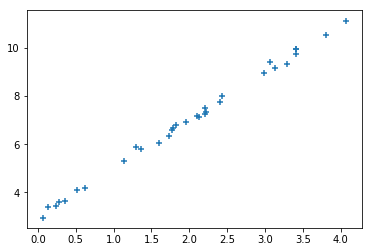

In [119]:
t.manual_seed(1000)
def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*5
    y = x*2+3+t.randn(batch_size,1)/10
    return x.float(),y.float()
x,y = get_fake_data(32)
plt.scatter(x,y,marker='+')

In [135]:
w = t.rand(1,1,requires_grad=True)
t.nn.init.constant_(w,10)
b = t.zeros(1,1,requires_grad=True)
losses=np.zeros(500)
lr=0.005
print(w.type(),b.type())

        
        

torch.FloatTensor torch.FloatTensor


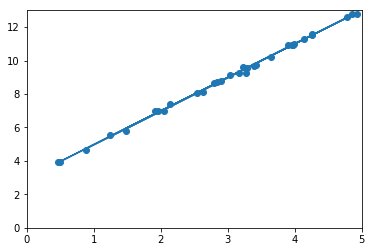

In [136]:
x,y = get_fake_data(32)
for i in range(500):
    
    y_pred = x.mm(w)+b.expand_as(y)
    
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    losses[i]=loss.item()
    
    loss.backward()
    w.data.sub_(lr,w.grad.data)
    b.data.sub_(lr,b.grad.data)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if i % 50 ==0:
        display.clear_output(wait=True)
#         x1 = t.arange(0,6).view(-1,1).float()
        y1=x.mm(w.data)+b.data.expand_as(x)
        plt.plot(x.numpy(),y1.numpy())

#         x2,y2 = get_fake_data(batch_size=20)
        plt.scatter(x.numpy(),y.numpy())
        
        plt.xlim(0,5)
        plt.ylim(0,13)
        plt.show()
        plt.pause(0.5)
        
        

        
        

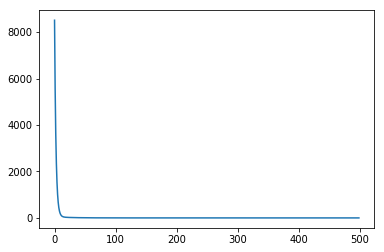

In [137]:
plt.plot(losses)
